# CSE291 HW2

# Coding 

(after doing all the things, I restarted the kernel and ran all)

# 8

(a)

import all the packages that might be used

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import scipy
from pylab import rcParams
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

using numpy to upload the data we need

In [2]:
predicates = np.loadtxt('predicate-matrix-continuous.txt')
animals = np.loadtxt('classes.txt', dtype = 'str')[:, 1]

see what is going on

In [3]:
predicates

array([[-1.  , -1.  , -1.  , ...,  2.35,  9.7 ,  8.38],
       [39.25,  1.39,  0.  , ..., 58.64, 20.14, 11.39],
       [83.4 , 64.79,  0.  , ..., 15.77, 13.41, 15.42],
       ...,
       [63.57, 43.1 ,  0.  , ..., 35.95, 28.26,  5.  ],
       [55.31, 55.46,  0.  , ...,  5.04, 18.89, 72.99],
       [10.22, 21.53, 27.73, ...,  3.96, 14.05, 37.98]])

using linkage algorithm as instructed to cluster and display a dendrogram

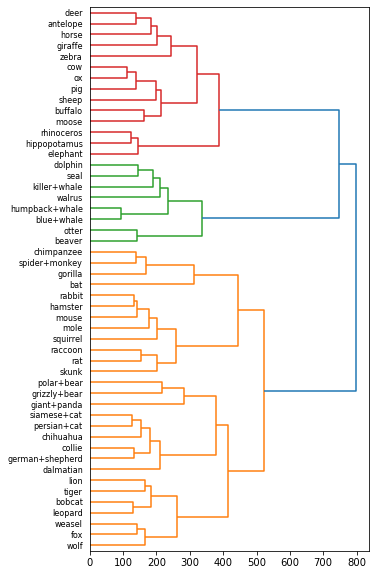

In [4]:
lk = scipy.cluster.hierarchy.linkage(predicates, 'ward')
rcParams['figure.figsize'] = 5, 10
d_gram = dendrogram(lk, orientation = 'right', labels = animals)

for better show, reset the size to a better value and display again

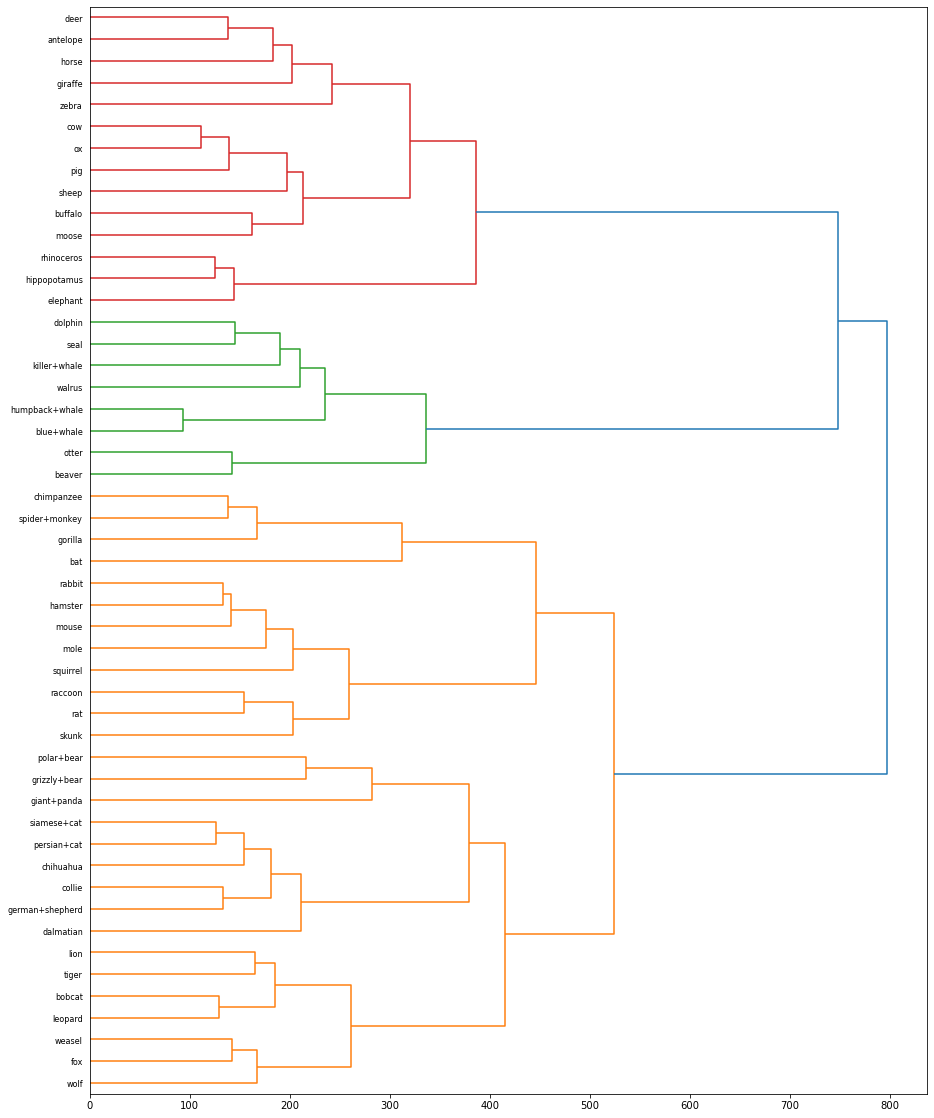

In [5]:
rcParams['figure.figsize'] = 15,20
d_gram = dendrogram(lk, orientation = 'right', labels = animals)

(b)

now, we will show what specifically in each 10 cluster

In [6]:
k = 10
clusters = scipy.cluster.hierarchy.fcluster(lk, k, criterion = 'maxclust')

for i in np.unique(clusters):
    indices = np.where(clusters == i)[0]
    print('Cluster {}: '.format(i))
    print(animals[indices])

Cluster 1: 
['tiger' 'leopard' 'fox' 'wolf' 'weasel' 'bobcat' 'lion']
Cluster 2: 
['dalmatian' 'persian+cat' 'german+shepherd' 'siamese+cat' 'chihuahua'
 'collie']
Cluster 3: 
['grizzly+bear' 'giant+panda' 'polar+bear']
Cluster 4: 
['skunk' 'mole' 'hamster' 'squirrel' 'rabbit' 'rat' 'mouse' 'raccoon']
Cluster 5: 
['spider+monkey' 'gorilla' 'chimpanzee' 'bat']
Cluster 6: 
['beaver' 'otter']
Cluster 7: 
['killer+whale' 'blue+whale' 'humpback+whale' 'seal' 'walrus' 'dolphin']
Cluster 8: 
['hippopotamus' 'elephant' 'rhinoceros']
Cluster 9: 
['moose' 'ox' 'sheep' 'buffalo' 'pig' 'cow']
Cluster 10: 
['antelope' 'horse' 'giraffe' 'zebra' 'deer']


then compute the cost

In [7]:
total_cost = 0
for i in np.unique(clusters):
    indices = np.where(clusters==i)[0]
    center = np.mean(predicates[indices], axis=0)
    cost = np.sum(np.linalg.norm(predicates[indices]-center,axis=1) ** 2)
    total_cost += cost

In [8]:
total_cost

679136.2672672619

now for the k-means method, set it as random

In [9]:
cost_list=[]
clusters_list=[]
for iteration in range(10):#need to train it randomly 10 times 
    k_means=sklearn.cluster.KMeans(n_clusters = 10,init='random')
    k_means.fit(predicates)
    clusters=k_means.labels_
    total_cost= 0
    each_cluster=[]
    for i in np.unique(clusters):
        indices=np.where(clusters==i)[0]
        center=np.mean(predicates[indices], axis=0)
        cost=np.sum(np.linalg.norm(predicates[indices]-center,axis=1) ** 2)
        total_cost+=cost
        each_cluster.append(('Cluster {}: '.format(i),animals[indices]))
    cost_list.append(total_cost)
    clusters_list.append(each_cluster)

  

print it out and it seems good

In [10]:
cost_list

[741440.7291238096,
 743084.6458926192,
 739678.2472394049,
 705215.3073183551,
 728010.7960079365,
 739302.4464085281,
 717332.7650766666,
 739030.038,
 726043.1557193217,
 724722.3775195238]

get the lowest cost index 

In [11]:
index_lowcost=cost_list.index(min(cost_list))
index_lowcost

3

the lowest cost

In [12]:
cost_list[index_lowcost]

705215.3073183551

the corresponding clusters

In [13]:
clusters_list[index_lowcost]

[('Cluster 0: ', array(['grizzly+bear', 'polar+bear'], dtype='<U15')),
 ('Cluster 1: ',
  array(['antelope', 'horse', 'moose', 'giraffe', 'buffalo', 'deer'],
        dtype='<U15')),
 ('Cluster 2: ',
  array(['german+shepherd', 'tiger', 'leopard', 'fox', 'wolf', 'bobcat',
         'lion'], dtype='<U15')),
 ('Cluster 3: ',
  array(['dalmatian', 'persian+cat', 'siamese+cat', 'chihuahua', 'collie'],
        dtype='<U15')),
 ('Cluster 4: ',
  array(['ox', 'sheep', 'giant+panda', 'pig', 'cow'], dtype='<U15')),
 ('Cluster 5: ',
  array(['spider+monkey', 'gorilla', 'chimpanzee'], dtype='<U15')),
 ('Cluster 6: ', array(['zebra'], dtype='<U15')),
 ('Cluster 7: ',
  array(['beaver', 'skunk', 'mole', 'hamster', 'squirrel', 'rabbit', 'bat',
         'rat', 'weasel', 'mouse', 'raccoon'], dtype='<U15')),
 ('Cluster 8: ',
  array(['hippopotamus', 'elephant', 'rhinoceros'], dtype='<U15')),
 ('Cluster 9: ',
  array(['killer+whale', 'blue+whale', 'humpback+whale', 'seal', 'otter',
         'walrus', 'dol